EN3160 Assignment 2 on Fitting and Alignment
M.W.R.Prabuddhika
200473E

1. In this question, using the knowledge on blob detection, i.e., using Laplacian of Gaussians and scale-space
extrema detection, we will detect and draw circles in the sunflower field image. Use the sunflower field
image provided:
im = cv.imread(’images/the_berry_farms_sunflower_field.jpeg’, cv.IMREAD_REDUCED_COLOR_4)
Report the parameters of the largest circles. Report the range of σ values used. You may not use the
cv2.HoughCircles function.

The largest radius is 42.42640687119285 pixels in radius.
The center of the largest circle is at ( 0.0 , 234.0 ).


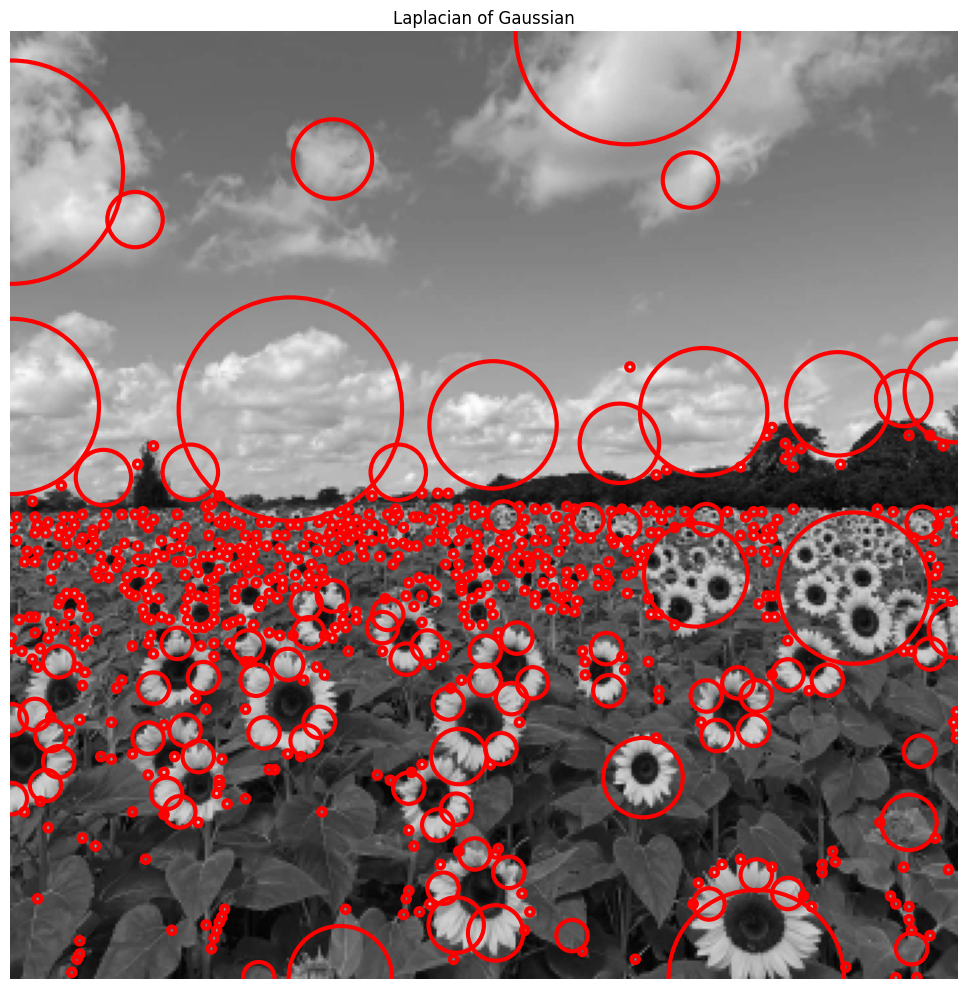

In [4]:
import cv2 as cv
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh

# Read the image
im_bw = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
img_gray = cv.cvtColor(im_bw, cv.COLOR_BGR2GRAY)

blobs_log = blob_log(img_gray, min_sigma=1, max_sigma=30, num_sigma=10, threshold=.1)
a = max(blobs_log[:, 2])
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
b = max(blobs_log[:, 2])
x0, y0, r = blobs_log[np.where(blobs_log[:, 2] == b)[0][0]]

# Compute blobs using LOG
blobs_log = blob_log(img_gray,min_sigma=1 ,max_sigma=30, num_sigma=10, threshold=.1)
a = max(blobs_log[:, 2])
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
b = max(blobs_log[:, 2])
x0, y0, r = blobs_log[np.where(blobs_log[:, 2] == b)[0][0]]

# Plot the results using matplotlib
fig, axes = plt.subplots(figsize=(10, 10), sharex=True, sharey=True)

axes.set_title('Laplacian of Gaussian')
axes.imshow(img_gray, cmap=plt.cm.gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=3, fill=False)
    axes.add_patch(c)
    axes.set_axis_off()

print("The largest radius is", b, "pixels in radius.")
print("The center of the largest circle is at (", x0, ",", y0, ").")
plt.tight_layout()
plt.show()


2. In this question, we will fit a line and, subsequently, a circle to a set of noisy points that conform to a line
and a circle. The code snippet in Listing 1 shows the code to generate this noisy point set X amounting to a
circle and a line. We can characterize a line with three parameters a,b,d where [a,b]
⊺
is the unit normal to
the line adn d is the perpendicular distance from the origin (see the slide on total least squares line fitting).
We can parameterize a circle using the center [x, y]
⊺ and the radius r. Given a set of inliers (points that we
know belong to a model, e.g., a circle) we can estimate the best fitting model (best circle) using an optimizer
like scipy.minimize (see the documentation). To learn a little of the problem setting in optimization, read
the section 1.1 of Boyd and Vandenberghe. We find the inliers within the framework of RANSAC. Consider
the noisy pointset X.
(a) Estimate the line using the RNASAC algorithm (must be coded on your own). Ensure that you apply
the constraint ∥[a,b]
⊺
∥ = 1. Carefuly select the error (the normal distance to the estimated line) and
the number of points that must be in the consensus.
(b) Subtract the consensus of the best line (remnant) and estimate the circle that fits the remnant using
RANSAC. Carefully select the threshold of error (radial error) and the number of points that must be
in the consensus.
(c) Show in the same plot, the point set, the line estimated from the sample leading to the best estimate,
the circle estimated from the sample leading to the best estimate, this sample of three points, the best
fit line, line inliers, the the best-fit circle and circle inliers. See Figure 1 for an example.
(d) What will happen if we fit the circle first?

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.123323560816004e-09
            Iterations: 11
            Function evaluations: 49
            Gradient evaluations: 11
rex.x:  [ 0.99730237 -0.07340325 -4.18874127]
Iteration =  0 . No. inliners =  8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0786208103638998e-11
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8
rex.x:  [ 0.9414585  -0.33712891 -3.64579168]
Iteration =  1 . No. inliners =  8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.975350980935442e-09
            Iterations: 9
            Function evaluations: 40
            Gradient evaluations: 9
rex.x:  [ 9.99992770e-01 -3.80847147e-03 -6.69681687e+00]
Iteration =  2 . No. inliners =  14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0867735142075082

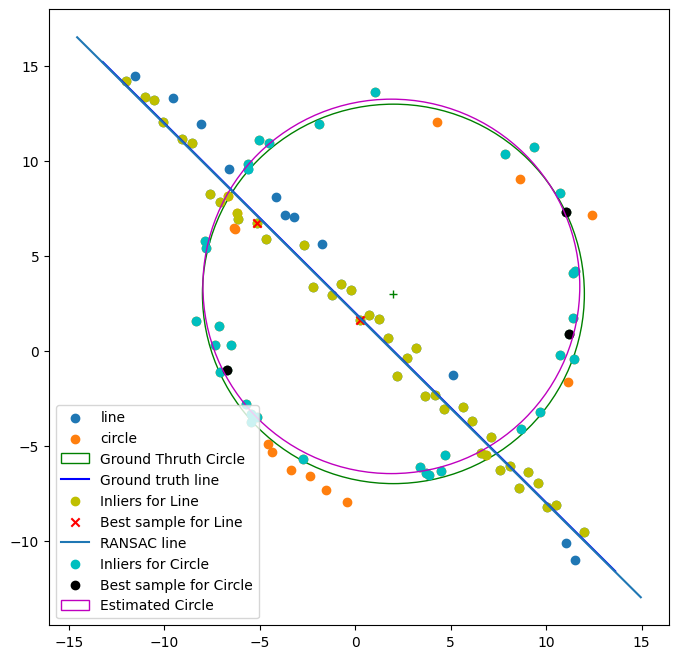

In [8]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import tikzplotlib

np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points
fig , ax = plt.subplots (1 ,1 , figsize=(8 ,8))
ax . scatter( X_line [ : , 0 ] , X_line [ : , 1 ] , label= 'line')
ax.scatter( X_circ [ : , 0 ] , X_circ [ : , 1 ] , label = 'circle')
circle_get = plt.Circle( ( x0_gt , y0_gt ) , r , color = 'g', fill=False , label='Ground Thruth Circle' )
ax . add_patch (circle_get)
ax . plot ( ( x0_gt ) , ( y0_gt ) ,'+', color = 'g' )
x_min , x_max = ax . get_xlim ( )
x_ = np . array ( [ x_min , x_max ] )
y_ = m*x_ + b
plt.plot( x_ , y_ ,color = 'b' , label= 'Ground truth line' )
plt.legend()

N = X.shape[0]
X_ = X

# RANSAC to fit a line
def line_tls(x, line_indices):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a*X_[line_indices,0] + b*X_[line_indices,1] - d))

# Constraint
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# Computing the consensus (inliers)
def consensus_line(X_, x, t):
    a, b, d = x[0], x[1], x[2]
    error = np.abs(a*X_[:,0] + b*X_[:,1] - d)
    return error < t
    
t = 1 # Threshold value to determine data points that are fit well by model.
d = 0.4*N   # Number of close data points required to assert that a model fits well to data.
s = 2       # Minimum number of data points required to estimate model parameters.

inliers_line = []        # Indinces of the inliers
max_iterations = 100
iteration = 0
best_model_line = []     # Best model normal (a, b) and distance from origin d
best_error = np.inf
best_sample_line = []    # Three-point sample leading to the best model computation
res_only_with_sample = [] # Result (a, b, d) only using the best sample
best_inliers_line = []   # Inliers of the model computed form the best sample

while iteration < max_iterations:   
    line_indices = np.random.randint(0, N, s) # A sample of three (s) points selected at random
    x0 = np.array([1, 1, 0]) # Initial estimate
    res = minimize(fun = line_tls, args = line_indices, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
    inliers_line = consensus_line(X_, res.x, t) # Computing the inliers
    print('rex.x: ', res.x)    
    print('Iteration = ', iteration, '. No. inliners = ', inliers_line.sum())
    if inliers_line.sum() > d:
        x0 = res.x
        # Computing the new model using the inliers
        res = minimize(fun = line_tls, args = inliers_line, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
        print(res.x, res.fun)
        if res.fun < best_error:
            print('A better model found ... ', res.x, res.fun)
            best_model_line = res.x
            best_error = res.fun
            best_sample_line = X_[line_indices,:]
            print("best_sample_line", best_sample_line)
            res_only_with_sample = x0
            best_inliers_line = inliers_line

    iteration += 1

print('Best line model', best_model_line)

ax.scatter(X_[best_inliers_line, 0], X_[best_inliers_line, 1], color='y', label='Inliers for Line')
ax.scatter(best_sample_line[:, 0], best_sample_line[:, 1],marker='x', color='r', label='Best sample for Line')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_,  label='RANSAC line')
ax.legend()


# Compute the consensus (inliers) for the best line model
inliers_line = consensus_line(X_, best_model_line, t)

# Subtract the inliers to obtain the remnant data

remnant_data = X_[~inliers_line]
print("remnant_data",remnant_data)

# Define a function to fit a circle using RANSAC
def circle_ransac(x, circle_indices):
    x0, y0, r = x[0], x[1], x[2]
    x1, y1 = remnant_data[circle_indices].T
    return np.sum((np.sqrt((x1 - x0)**2 + (y1 - y0)**2) - r)**2)

# Define a constraint function for circle radius
def g_circle(x):
    return (x[0]-x0_gt)**2 + (x[1]-y0_gt)**2 - r**2

# Computing the consensus (inliers circle)
def consensus_circle(X, x, t):
    error = np.abs(np.linalg.norm(X - x[:2], axis=1) - x[2])
    #error = np.sqrt(np.absolute((X[:, 0] - x[0]) ** 2
     #                           + (X[:, 1] - x[1]) ** 2 - x[2] ** 2))
    return error < t

circle_cons = {'type': 'eq', 'fun': g_circle}

# Set RANSAC parameters for circle fitting
t_circle = 1.0  # Threshold for radial error
d_circle =  35#.4* len(remnant_data)  # Minimum number of points in the consensus
s_circle = 3 # Minimum number of points to estimate the circle parameters

best_model_circle = []  # Best circle parameters (x0, y0, r)
best_error_circle = np.inf
best_inliers_circle = []  # Inliers of the circle model
best_sample_circle = []  # Three-point sample leading to the best model computation
iteration_circle = 0
max_iterations_circle = 100

while iteration_circle < max_iterations_circle:
    indices_circle = np.random.randint(0,len(remnant_data), s_circle)
    x0_circle = np.array([0, 0, 0])  # Initial estimate (x0, y0, r)
    res_circle = minimize(fun=circle_ransac, args=indices_circle, x0=x0_circle, tol=1e-6)
    inliers_circle = consensus_circle(remnant_data, res_circle.x, t_circle)
    print('Iteration =', iteration_circle, '. No. inliers =', inliers_circle.sum())
    
    if inliers_circle.sum() > d_circle:
        x0_circle = res_circle.x
        # Computing the new model using the inliers
        res_circle = minimize(fun = circle_ransac, args = inliers_circle, x0 = x0_circle, tol= 1e-6)
        print(res_circle.x, res_circle.fun)

        if res_circle.fun < best_error_circle:
            print('A better circle model found ...', res_circle.x, res_circle.fun)
            print('Best model', best_model_circle)
            best_model_circle = res_circle.x
            best_error_circle = res_circle.fun
            best_circle_indices = indices_circle
            print("best_sample_circle", best_sample_circle)
            best_inliers_circle = inliers_circle
    
    iteration_circle += 1

print('Best circle model', best_model_circle)


ax.scatter(remnant_data[best_inliers_circle, 0], remnant_data[best_inliers_circle, 1], color='c', label='Inliers for Circle')
ax.scatter(remnant_data[best_circle_indices,0], remnant_data[best_circle_indices,1], color='k', label='Best sample for Circle')

x_circle = best_model_circle[0]
y_circle = best_model_circle[1]
radius_circle = best_model_circle[2]
circle_estimated = plt.Circle((x_circle, y_circle), radius_circle, color='m', fill=False, label='Estimated Circle')
ax.add_patch(circle_estimated)
ax.legend()

Figure 2 shows an architectural image1 with a flag 2
superimposed. This is done by clicking four points on a
planar surface in the architectural image, computing a homography that maps the flag image to this plane,
and warping the flag, and blending on to the architectural image. Carry this out for a couple of image pairs
of you own choice. You may explain the (non-technical) rationale of your choice.

Image shape: (768, 1024, 3)
Flag shape: (128, 255, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Selected Points: [(149, 211), (518, 289), (135, 520), (521, 518)]
Homograph matrix
 [[ 2.15587916e+00 -1.58685220e-01  1.49000000e+02]
 [ 7.01343891e-01  2.22412684e+00  2.11000000e+02]
 [ 1.36837903e-03 -3.65260888e-04  1.00000000e+00]]


(-0.5, 1023.5, 767.5, -0.5)

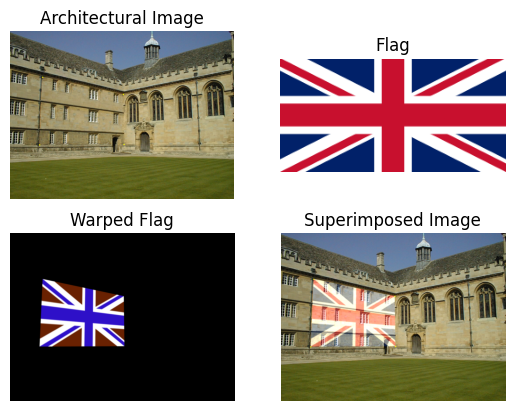

In [5]:
import cv2 as cv
import numpy as np
import matplotlib . pyplot as plt

# Initialize a list to store the selected points
points = []

# Callback function for mouse click events
#click in orderly top-left, top-right, bottom-left, and bottom-right corners of the flag image respectively
def mouse_click(event, x, y, flags, param):
    global points

    if event == cv.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv.circle(architectural_image, (x, y), 3, (0, 255, 255), -1)
        cv.imshow('Image', architectural_image)

# Load the images
architectural_image = cv.imread("Wadham College image.jpg")
flag_img = cv.imread("Flag_UK.jpg")

architectural_image = architectural_image.astype(np.float32) / np.iinfo(architectural_image.dtype).max
flag_img = flag_img.astype(np.float32) / np.iinfo(flag_img.dtype).max

print("Image shape:", architectural_image.shape)
print("Flag shape:", flag_img.shape)

cv.imshow('Image', architectural_image)
cv.setMouseCallback('Image', mouse_click)

# Wait for the user to select four points
while len(points) < 4:
    cv.waitKey(1)

cv.destroyAllWindows()

print("Selected Points:", points)

dst_points = np.array(points).astype(np.float32)
h, w = flag_img.shape[:2]
src_points = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

H = cv.getPerspectiveTransform( src_points,dst_points) #homograph matrix
print('Homograph matrix\n',H)

flag_warped = cv.warpPerspective(flag_img, H, (architectural_image.shape[1], architectural_image.shape[0]))
superimposed_image = cv.addWeighted(architectural_image, 1, flag_warped, 0.5, 0)


plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(architectural_image, cv.COLOR_BGR2RGB))
plt.title('Architectural Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(flag_img, cv.COLOR_BGR2RGB))
plt.title('Flag')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(flag_warped)
plt.title('Warped Flag')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(superimposed_image, cv.COLOR_BGR2RGB))
plt.title('Superimposed Image')
plt.axis('off')




4. In this questions, we will stitch the two Graffiti image3
img1.ppm onto img5.ppm.
(a) Compute and match SIFT features between the two images.
(b) Compute the homography using your own code within RANSAC and compare with the homography
given in the dataset.
(c) Stitch img1.ppm onto img5.ppm.

(a)

In [34]:
import cv2 as cv
import numpy as np

# Load the images
img1 = cv.imread('Wadham College image.jpg')
img5 = cv.imread('img2.ppm')

# Convert the images to grayscale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv.SIFT_create()

# Detect and compute SIFT descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints5, descriptors5 = sift.detectAndCompute(gray5, None)

# Initialize the matcher (FLANN based Matcher)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
matcher = cv.FlannBasedMatcher(index_params, search_params)

# Match the descriptors
matches = matcher.knnMatch(descriptors1, descriptors5, k=2)

# Store all the good matches as per Lowe's ratio test.
good_matches = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good_matches.append(m)

# Draw the good matches
output_img = cv.drawMatches(img1, keypoints1, img5, keypoints5, good_matches, None)

# Display the output image
cv.imshow('Matches', output_img)
cv.waitKey(0)
cv.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
